<a href="https://colab.research.google.com/github/00016668/Machine-Learning-Projects/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://github.com/RyanNolanData/YouTubeData/raw/main/500hits.csv", encoding='latin-1')
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [5]:
df.drop(columns=['PLAYER', 'CS'], inplace=True)

In [7]:
correlation_matrix = df.corr()
correlation_matrix

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
YRS,1.000000,0.804500,0.726805,0.519114,0.645507,0.476943,0.180773,0.271686,0.275596,0.443646,0.220438,0.151675,-0.029745,0.373235
G,0.804500,1.000000,0.947020,0.652633,0.829722,0.658190,0.130209,0.436495,0.488654,0.594580,0.412063,0.151765,-0.059923,0.402364
AB,0.726805,0.947020,1.000000,0.750055,0.919174,0.694401,0.269122,0.330510,0.369725,0.492536,0.306878,0.285416,0.052611,0.447568
R,0.519114,0.652633,0.750055,1.000000,0.822852,0.618914,0.470546,0.326315,0.204827,0.675418,0.151946,0.473194,0.379448,0.546267
H,0.645507,0.829722,0.919174,0.822852,1.000000,0.767878,0.441744,0.250107,0.317033,0.464482,0.112928,0.299625,0.435632,0.569776
2B,0.476943,0.658190,0.694401,0.618914,0.767878,1.000000,0.170483,0.432326,0.531719,0.435225,0.316729,0.007245,0.358777,0.418181
3B,0.180773,0.130209,0.269122,0.470546,0.441744,0.170483,1.000000,-0.392467,-0.421388,0.028401,-0.508560,0.496148,0.502453,0.370208
HR,0.271686,0.436495,0.330510,0.326315,0.250107,0.432326,-0.392467,1.000000,0.820956,0.503183,0.763190,-0.350574,-0.115874,0.202891
RBI,0.275596,0.488654,0.369725,0.204827,0.317033,0.531719,-0.421388,0.820956,1.000000,0.432796,0.685986,-0.466949,-0.033295,0.212778
BB,0.443646,0.594580,0.492536,0.675418,0.464482,0.435225,0.028401,0.503183,0.432796,1.000000,0.376272,0.091465,0.052411,0.355777


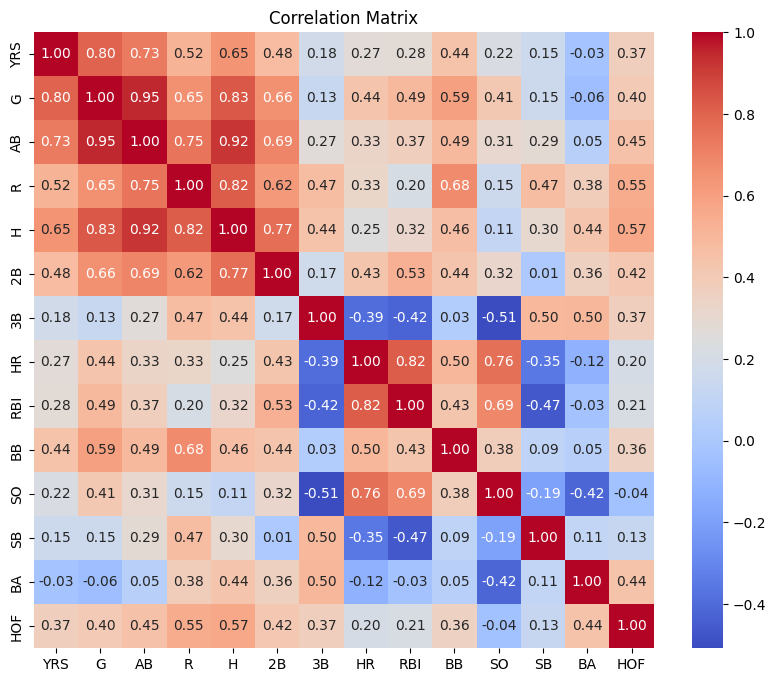

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [14]:
df.corr()['HOF']

,HOF
YRS,0.373235
G,0.402364
AB,0.447568
R,0.546267
H,0.569776
2B,0.418181
3B,0.370208
HR,0.202891
RBI,0.212778
BB,0.355777


In [15]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [18]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [19]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = dtc.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        61
           1       0.69      0.69      0.69        32

    accuracy                           0.78        93
   macro avg       0.76      0.76      0.76        93
weighted avg       0.78      0.78      0.78        93

[[51 10]
 [10 22]]


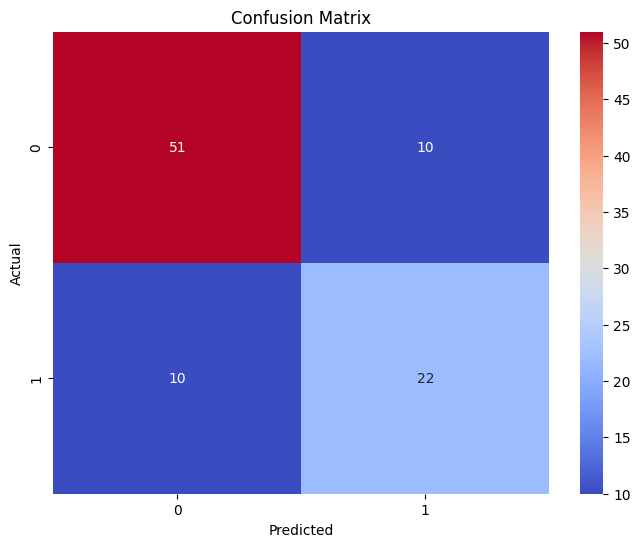

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        61
           1       0.69      0.69      0.69        32

    accuracy                           0.78        93
   macro avg       0.76      0.76      0.76        93
weighted avg       0.78      0.78      0.78        93



In [28]:
dtc.feature_importances_

array([0.04057469, 0.02742913, 0.04430795, 0.05593063, 0.3918692 ,
       0.04489872, 0.05217487, 0.00816891, 0.08844993, 0.06761274,
       0.03117801, 0.05102067, 0.09638455])

In [29]:
X.columns

Index(['YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB',
       'BA'],
      dtype='object')

In [34]:
features = pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['Importance'])
features.sort_values(by='Importance', ascending=False)

,Importance
H,0.391869
BA,0.096385
RBI,0.088450
BB,0.067613
R,0.055931
3B,0.052175
SB,0.051021
2B,0.044899
AB,0.044308
YRS,0.040575


In [35]:
dtc2 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.04)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [36]:
y_pred2 = dtc2.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[50 11]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        61
           1       0.68      0.72      0.70        32

    accuracy                           0.78        93
   macro avg       0.76      0.77      0.77        93
weighted avg       0.79      0.78      0.79        93



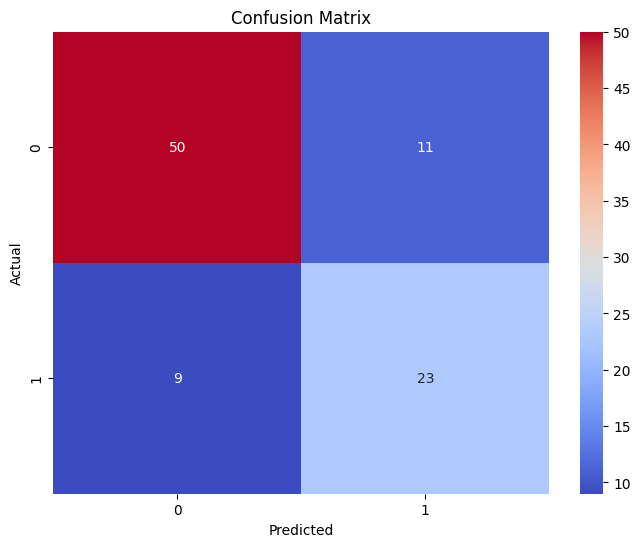

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap='coolwarm', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()